Numerical Features Statistics:
--------------------------------------------------

Age:
Mean: 44.043
Median: 44.000
Std: 15.208
Skewness: -0.010
Kurtosis: -1.191
Shapiro-Wilk test: statistic=0.955, p-value=6.170e-30

Purchase Amount (USD):
Mean: 60.143
Median: 60.000
Std: 23.674
Skewness: -0.007
Kurtosis: -1.225
Shapiro-Wilk test: statistic=0.951, p-value=5.087e-31

Review Rating:
Mean: 3.751
Median: 3.800
Std: 0.710
Skewness: 0.001
Kurtosis: -1.165
Shapiro-Wilk test: statistic=0.957, p-value=1.966e-29

Previous Purchases:
Mean: 25.403
Median: 25.000
Std: 14.519
Skewness: -0.007
Kurtosis: -1.212
Shapiro-Wilk test: statistic=0.952, p-value=8.057e-31

Categorical Features Value Counts:
--------------------------------------------------

Gender:
Male: 67.3%
Female: 32.7%

Category:
Clothing: 44.6%
Accessories: 31.8%
Footwear: 15.3%
Outerwear: 8.4%

Size:
M: 45.0%
L: 26.9%
S: 17.3%
XL: 10.8%

Season:
Spring: 25.6%
Winter: 25.5%
Summer: 24.5%
Fall: 24.4%

Subscription Status:
No: 73.4%
Yes:

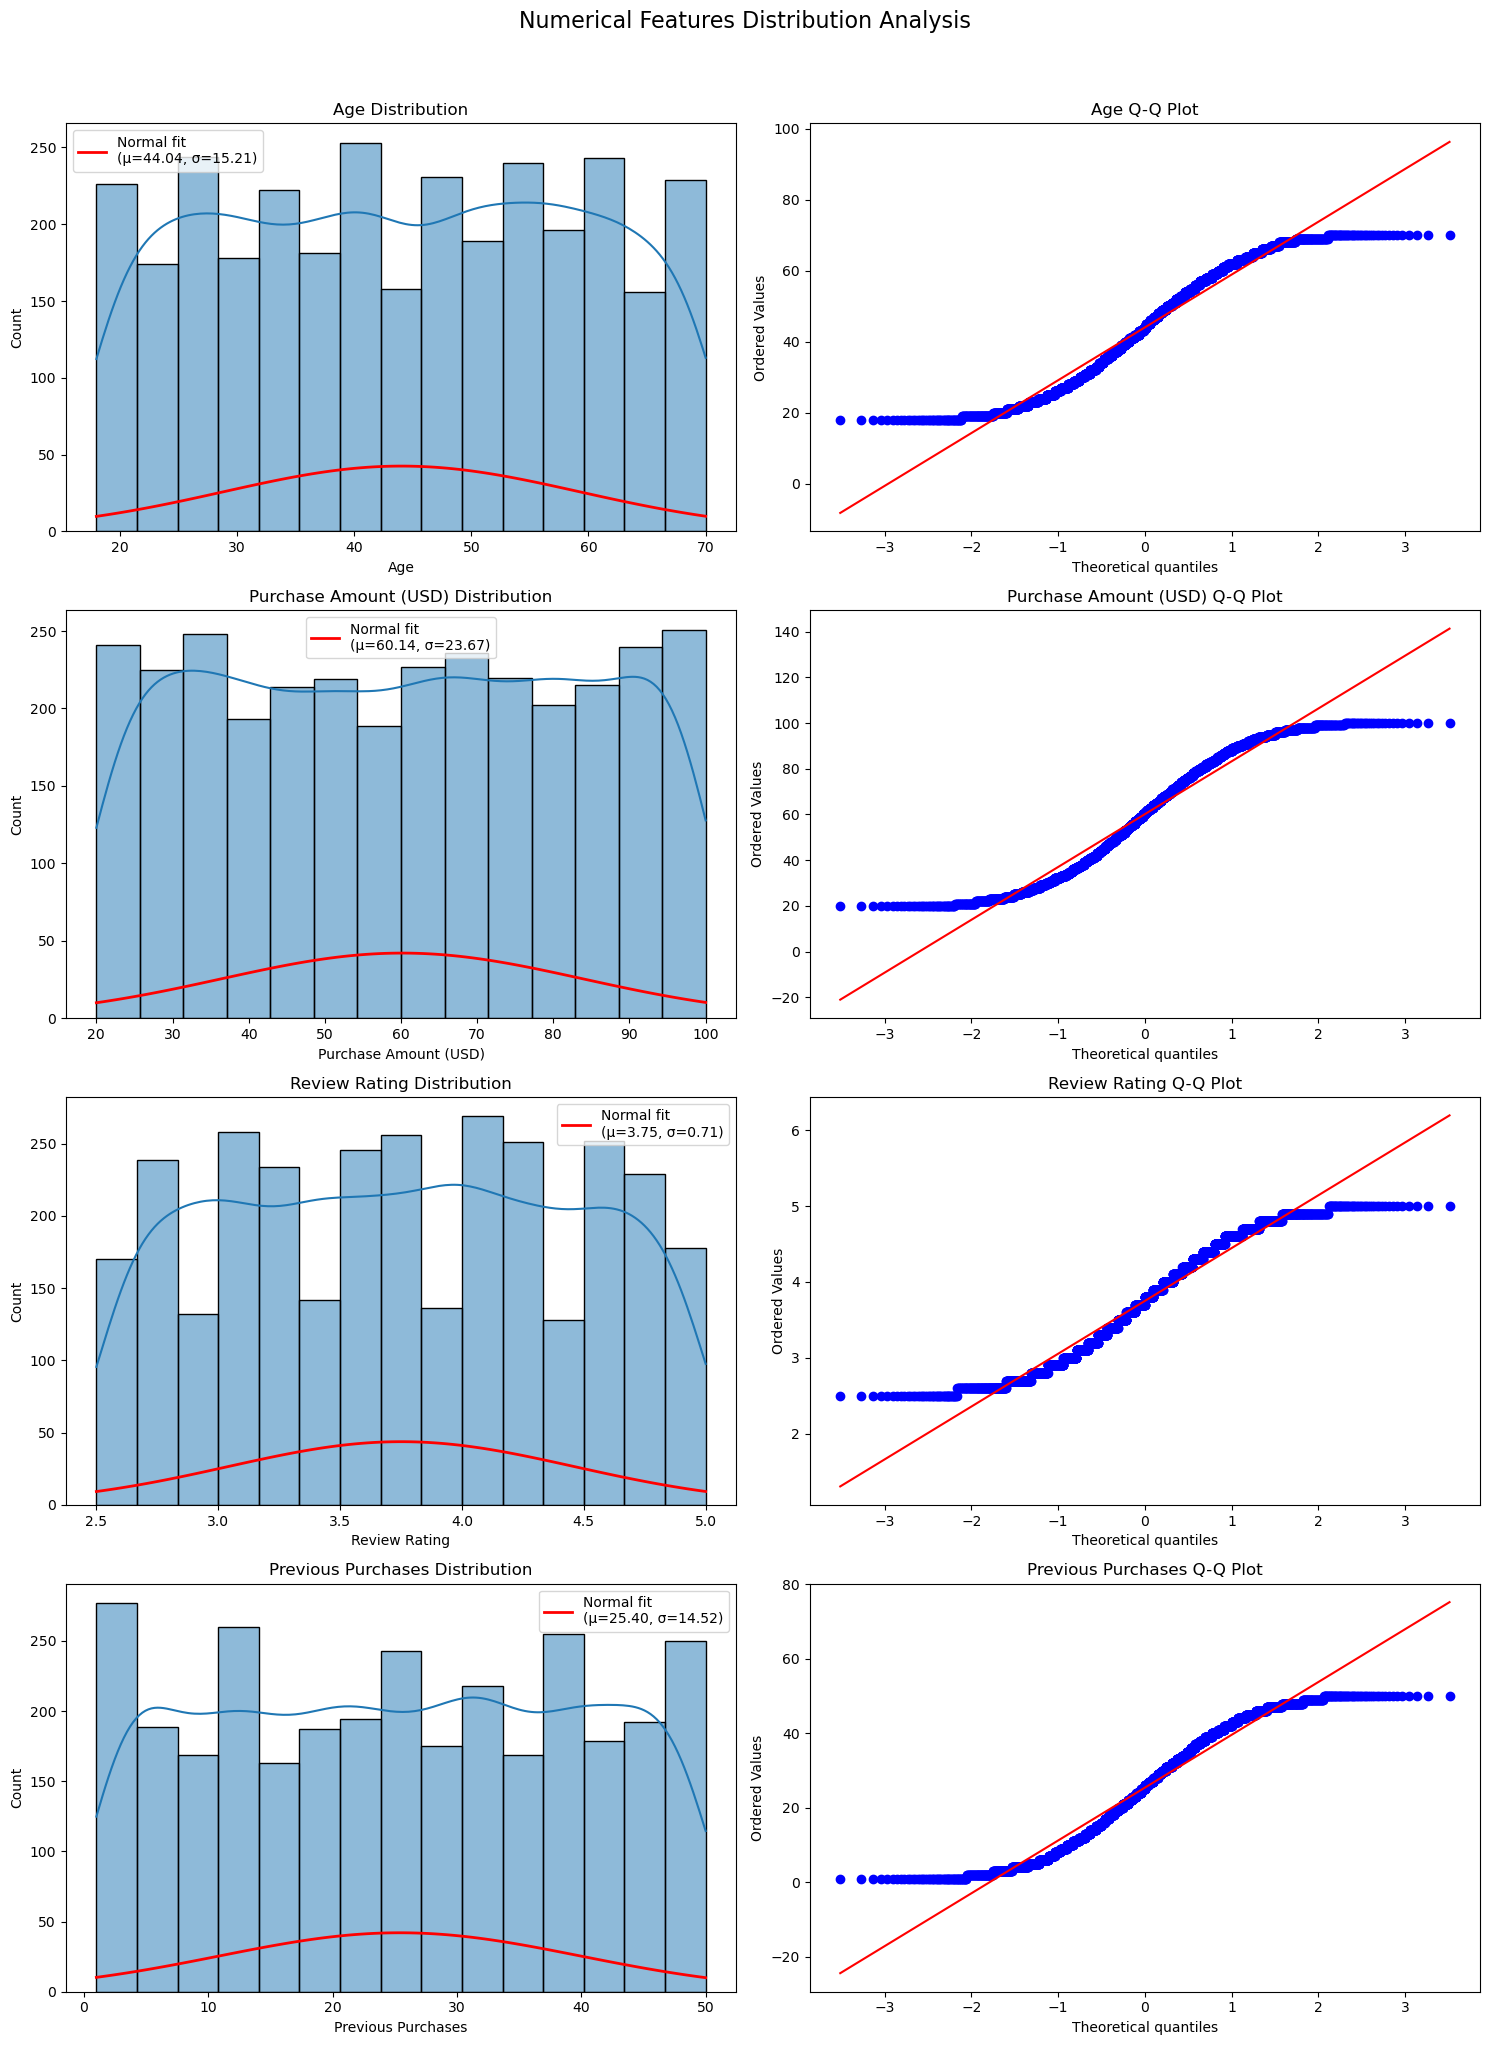

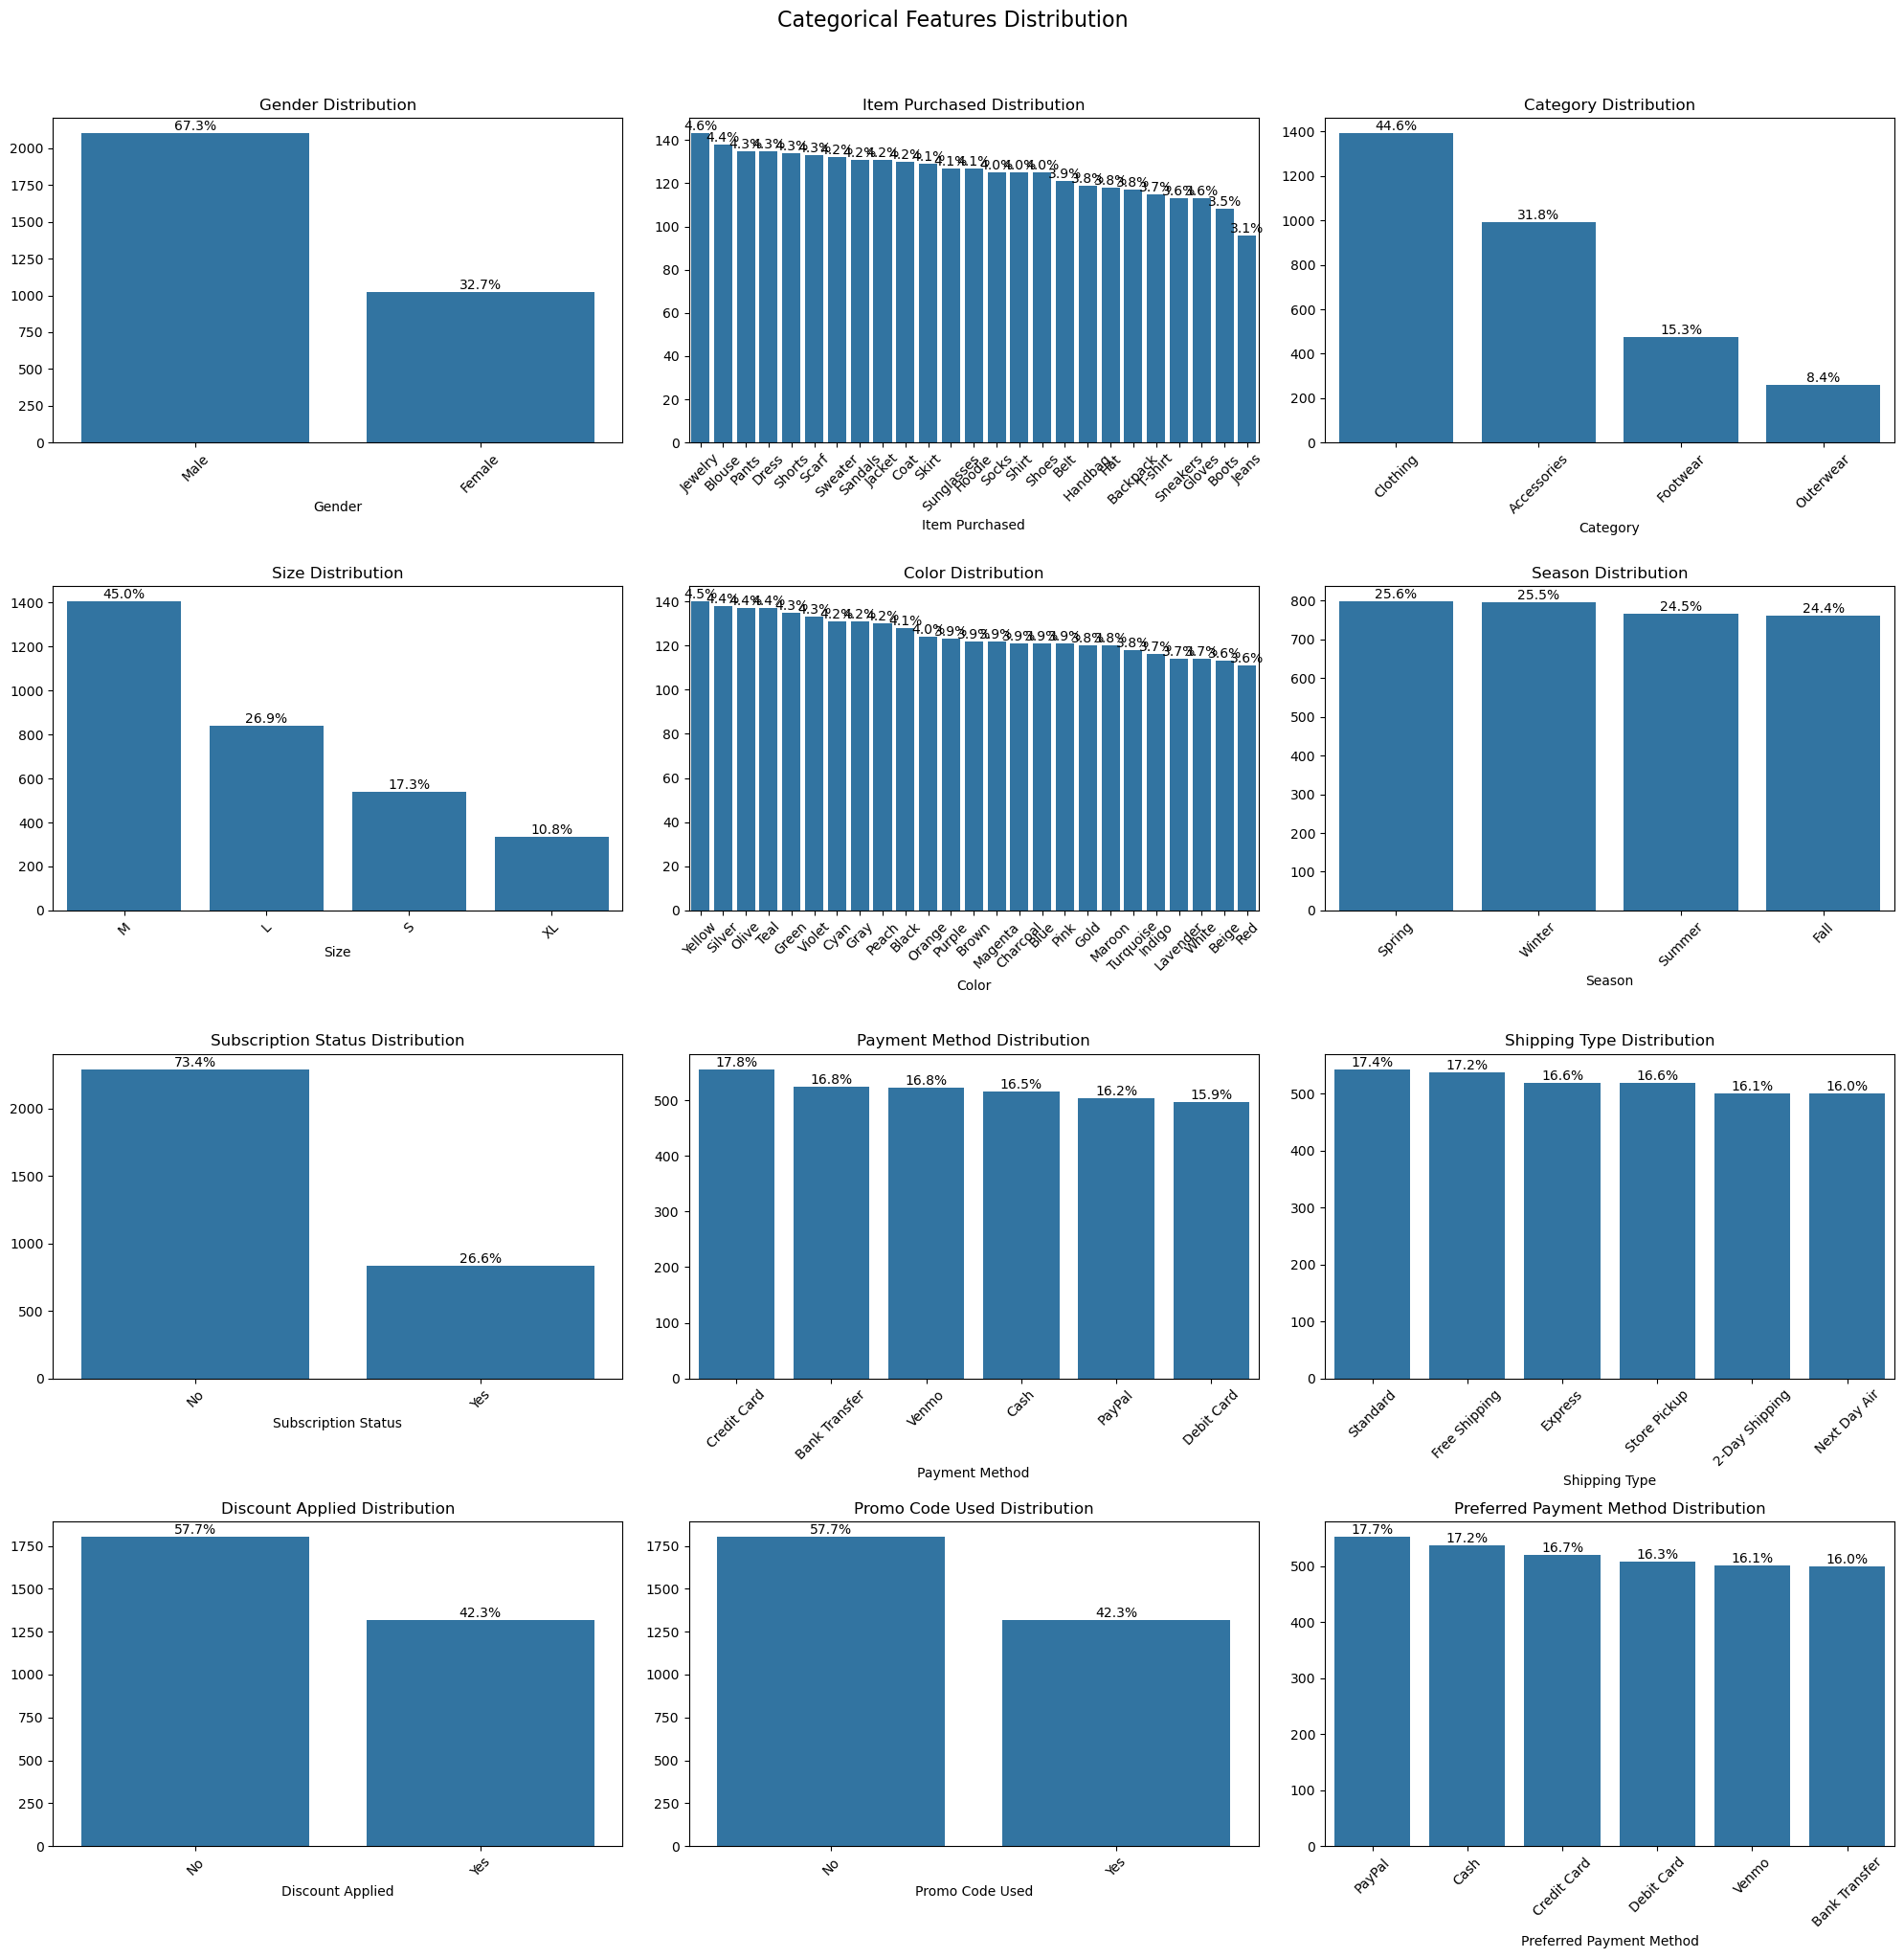

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Data Loading and Preprocessing
def load_and_split_data():
    # Load data
    df = pd.read_csv('shopping_trends.csv')
    
    # Remove Location column as it has too many categories
    df = df.drop('Location', axis=1)
    
    # Split data (80-20)
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    return train_df, test_df

# 2. EDA and Distribution Analysis
def analyze_numerical_distributions(train_df):
    numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
    
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 5*len(numerical_features)))
    fig.suptitle('Numerical Features Distribution Analysis', fontsize=16, y=1.02)
    
    for i, feature in enumerate(numerical_features):
        data = train_df[feature]
        
        # Histogram with normal distribution fit
        sns.histplot(data=data, kde=True, ax=axes[i,0])
        
        # Fit normal distribution
        mu, std = stats.norm.fit(data)
        xmin, xmax = data.min(), data.max()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        axes[i,0].plot(x, p * len(data) * (xmax-xmin)/100, 'r-', lw=2,
                      label=f'Normal fit\n(μ={mu:.2f}, σ={std:.2f})')
        axes[i,0].set_title(f'{feature} Distribution')
        axes[i,0].legend()
        
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[i,1])
        axes[i,1].set_title(f'{feature} Q-Q Plot')
    
    plt.tight_layout()
    return fig

def analyze_categorical_distributions(train_df):
    categorical_features = ['Gender', 'Item Purchased', 'Category', 'Size', 
                          'Color', 'Season', 'Subscription Status', 
                          'Payment Method', 'Shipping Type', 'Discount Applied',
                          'Promo Code Used', 'Preferred Payment Method']
    
    # Calculate number of rows and columns for subplot grid
    n_cols = 3
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle('Categorical Features Distribution', fontsize=16, y=1.02)
    
    for i, feature in enumerate(categorical_features):
        row = i // n_cols
        col = i % n_cols
        
        # Get value counts and percentages
        value_counts = train_df[feature].value_counts()
        total = len(train_df)
        
        # Create bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} Distribution')
        axes[row, col].tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        for j, v in enumerate(value_counts.values):
            percentage = (v/total) * 100
            axes[row, col].text(j, v, f'{percentage:.1f}%', 
                              ha='center', va='bottom')
    
    # Remove empty subplots if any
    for i in range(len(categorical_features), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    return fig

def print_distribution_stats(train_df):
    print("Numerical Features Statistics:")
    print("-" * 50)
    numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
    
    for feature in numerical_features:
        data = train_df[feature]
        
        # Basic statistics
        stats_dict = {
            'Mean': np.mean(data),
            'Median': np.median(data),
            'Std': np.std(data),
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data)
        }
        
        # Shapiro-Wilk test for normality
        shapiro_stat, shapiro_p = stats.shapiro(data)
        
        print(f"\n{feature}:")
        for stat_name, value in stats_dict.items():
            print(f"{stat_name}: {value:.3f}")
        print(f"Shapiro-Wilk test: statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3e}")
    
    print("\nCategorical Features Value Counts:")
    print("-" * 50)
    categorical_features = ['Gender', 'Category', 'Size', 'Season', 
                          'Subscription Status', 'Payment Method', 
                          'Shipping Type', 'Discount Applied',
                          'Promo Code Used', 'Preferred Payment Method',"Color"]
    
    for feature in categorical_features:
        print(f"\n{feature}:")
        value_counts = train_df[feature].value_counts()
        percentages = value_counts / len(train_df) * 100
        for val, count in zip(value_counts.index, percentages):
            print(f"{val}: {count:.1f}%")

# 3. Main execution
def main():
    # Load and split data
    train_df, test_df = load_and_split_data()
    
    # Analyze distributions
    numerical_fig = analyze_numerical_distributions(train_df)
    categorical_fig = analyze_categorical_distributions(train_df)
    
    # Print statistical analysis
    print_distribution_stats(train_df)
    
    # Save figures
    numerical_fig.savefig('numerical_distributions.png', bbox_inches='tight')
    categorical_fig.savefig('categorical_distributions.png', bbox_inches='tight')
    
    return train_df, test_df

if __name__ == "__main__":
    train_df, test_df = main()